In [2006]:
import json
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
from scipy import stats
import tweepy

In [2007]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [2008]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')

In [2009]:
consumer_key = 'uPe1VFELQCpH8Vw9HEFUCMKfa'
consumer_secret = '1eub02o5J5jMWTi28oVzRjfG6on5ttyBQ749e0ns53hZBUtWSP'
#access_token = 'Y2271657878-KHplldHJyBtaatabWS5a2d4gfGXgnG4Q5TNmz2p'
#access_secret = 'qQXrioCxXQoMbf54dCRXJfbMwSjZQNxjxQsso31YYNxh7'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [2010]:
tweets =[]
faulty = []
with open('tweet_json.txt', 'w', encoding= 'utf-8') as file:
    for tweet_id in tweet_archive['tweet_id']:
        try:
            tweet_d = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_d._json, file)
            file.write('\n')
            tweets.append(tweet_id)
        except Exception as e:
            print(tweet_id,e)
            faulty.append(tweet_id)

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 [{'code': 144, 'message': 'No sta

In [2123]:
tweet_json = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

In [2124]:
TJ = tweet_json.copy()
TA = tweet_archive.copy()
IP= image_pred.copy()

## Visual Assessment:- 

In [2125]:
TA   #Twitter Archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [2126]:
TJ  #Twitter API

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37234,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7979,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32020,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5924,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24125,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3912,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40556,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8128,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",38786,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,8812,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19490,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,2932,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11375,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,1944,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",62823,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,17764,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",26806,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,4029,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",30716,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,6942,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [2127]:
IP

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [2128]:
IP #Image Predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [2129]:
tweet_archive.loc[tweet_archive['tweet_id'].isin(faulty),] #list of tweet id which were unavailable in API

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None
104,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872261713...,13,10,Harry,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None
182,856602993587888130,NaN,NaN,2017-04-24 20:17:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Luna. It's her first ti...,8.447048e+17,4.196984e+09,2017-03-23 00:18:10 +0000,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a heartwarming scene of ...,7.562885e+17,4.196984e+09,2016-07-22 00:43:32 +0000,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None


In [2130]:
IP.tweet_id.duplicated().sum()

0

## Programmatic Assessment :- 

In [2131]:
TA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [2132]:
TA.tweet_id.duplicated().sum()

0

In [2133]:
TA.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [2134]:
TA['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [2135]:
TA.rating_denominator.value_counts().head(5)

10    2333
11       3
50       3
80       2
20       2
Name: rating_denominator, dtype: int64

In [2136]:
len(TA)

2356

In [2137]:
TA[TA['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


Interestingly, rating denominator is mostly 10 and the dataframe with denominator not equal to 10 contains a lot of null values.

In [2138]:
TA['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Thus, 2221 tweets are sent through 'iphone',91 through Vine, 33 through 'web' and 11 through 'tweetdeck'.

In [2139]:
TA['retweeted_status_id'].isnull().value_counts()

True     2175
False     181
Name: retweeted_status_id, dtype: int64

In [2140]:
TA['retweeted_status_user_id'].isnull().value_counts()

True     2175
False     181
Name: retweeted_status_user_id, dtype: int64

###### Thus, there are 181 retweets and 2175 original tweets

In [2141]:
TA['in_reply_to_status_id'].isnull().value_counts()

True     2278
False      78
Name: in_reply_to_status_id, dtype: int64

In [2142]:
TA['in_reply_to_user_id'].isnull().value_counts()

True     2278
False      78
Name: in_reply_to_user_id, dtype: int64

###### Thus, there are 78 replies to tweets.

In [2143]:
TA['name'].sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [2144]:
# Rows where the value of 'name' is lowercase - indicates that it is not an actual name
TA.loc[(TA['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


Thus, all the lowercase words in the 'name' column doesn't seem to be actual names. The 'None' value in dog columns ('doggo','floofer' etc) further seems to verify our argument.

In [2145]:
# with atleast 1 dog:-

TA[(TA['doggo'] != 'None') | (TA['floofer'] != 'None') | (TA['pupper'] != 'None') | (TA['puppo'] != 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,None,None,None,puppo
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None


In [2146]:
#unusual names
TA[TA['name'].apply(len) < 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [2147]:
TA[TA['text'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [2148]:
TJ.favorited.value_counts()

False    2333
Name: favorited, dtype: int64

In [2149]:
TJ.isna().any()

contributors                      True
coordinates                       True
created_at                       False
display_text_range               False
entities                         False
extended_entities                 True
favorite_count                   False
favorited                        False
full_text                        False
geo                               True
id                               False
id_str                           False
in_reply_to_screen_name           True
in_reply_to_status_id             True
in_reply_to_status_id_str         True
in_reply_to_user_id               True
in_reply_to_user_id_str           True
is_quote_status                  False
lang                             False
place                             True
possibly_sensitive                True
possibly_sensitive_appealable     True
quoted_status                     True
quoted_status_id                  True
quoted_status_id_str              True
quoted_status_permalink  

In [2150]:
TJ['contributors'].isnull().value_counts()

True    2333
Name: contributors, dtype: int64

In [2151]:
TJ['coordinates'].isnull().value_counts()

True    2333
Name: coordinates, dtype: int64

In [2152]:
TJ['geo'].isnull().value_counts()

True    2333
Name: geo, dtype: int64

In [2153]:
TJ['in_reply_to_screen_name'].isnull().value_counts()

True     2256
False      77
Name: in_reply_to_screen_name, dtype: int64

In [2154]:
TJ['in_reply_to_status_id'].isnull().value_counts()

True     2256
False      77
Name: in_reply_to_status_id, dtype: int64

In [2155]:
TJ['in_reply_to_status_id_str'].isnull().value_counts()

True     2256
False      77
Name: in_reply_to_status_id_str, dtype: int64

In [2156]:
TJ['in_reply_to_user_id'].isnull().value_counts()

True     2256
False      77
Name: in_reply_to_user_id, dtype: int64

In [2157]:
TJ['in_reply_to_user_id_str'].isnull().value_counts()

True     2256
False      77
Name: in_reply_to_user_id_str, dtype: int64

In [2158]:
TJ['place'].isnull().value_counts()

True     2332
False       1
Name: place, dtype: int64

In [2159]:
TJ['possibly_sensitive'].isnull().value_counts()

False    2199
True      134
Name: possibly_sensitive, dtype: int64

In [2160]:
TJ['possibly_sensitive_appealable'].isnull().value_counts()

False    2199
True      134
Name: possibly_sensitive_appealable, dtype: int64

In [2161]:
TJ['quoted_status'].isnull().value_counts()

True     2309
False      24
Name: quoted_status, dtype: int64

In [2162]:
TJ['quoted_status_id'].isnull().value_counts()

True     2307
False      26
Name: quoted_status_id, dtype: int64

In [2163]:
TJ['quoted_status_permalink'].isnull().value_counts()

True     2307
False      26
Name: quoted_status_permalink, dtype: int64

In [2164]:
TJ['quoted_status_id_str'].isnull().value_counts()

True     2307
False      26
Name: quoted_status_id_str, dtype: int64

In [2165]:
TJ['truncated'].value_counts() #All the rows of 'truncated' column has same value. i.e : 'False'

False    2333
Name: truncated, dtype: int64

In [2166]:
TJ['retweeted'].value_counts()  #All the rows of 'retweeted' column has same value. i.e : 'False'

False    2333
Name: retweeted, dtype: int64

In [2167]:
TJ['retweeted_status'].isnull().value_counts()

True     2168
False     165
Name: retweeted_status, dtype: int64

In [2168]:
TJ['is_quote_status'].value_counts()

False    2302
True       31
Name: is_quote_status, dtype: int64

In [2169]:
TJ['lang'].value_counts() #2315 (98%) of tweets are in English.

en     2315
und       7
nl        3
in        3
es        1
tl        1
et        1
ro        1
eu        1
Name: lang, dtype: int64

In [2170]:
TJ[TJ['lang'] != 'en']  

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
31,NaN,NaN,2017-07-15 02:45:48,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,NaN,...,NaN,8.860534e+17,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",104,False,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
158,NaN,NaN,2017-05-04 17:01:34,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,NaN,...,NaN,NaN,NaN,NaN,30304,False,{'created_at': 'Fri Aug 05 21:19:27 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
278,NaN,NaN,2017-03-04 22:12:52,"[12, 18]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1721,False,@markhoppus 182/10,NaN,...,NaN,NaN,NaN,NaN,342,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
393,NaN,NaN,2017-01-23 00:56:15,"[15, 20]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,725,False,@HistoryInPics 13/10,NaN,...,NaN,NaN,NaN,NaN,26,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
602,NaN,NaN,2016-11-08 23:01:49,"[0, 41]","{'hashtags': [{'text': 'ImWithThor', 'indices'...",NaN,5198,False,#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,NaN,...,{'created_at': 'Tue Nov 08 22:54:11 +0000 2016...,7.961237e+17,7.961237e+17,"{'url': 'https://t.co/a18mzkhTf6', 'expanded':...",1905,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
849,NaN,NaN,2016-08-05 21:19:27,"[0, 112]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 761672828462718981, 'id_str'...",51350,False,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,NaN,...,NaN,NaN,NaN,NaN,30304,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
960,NaN,NaN,2016-07-03 00:43:15,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 749403085643063300, 'id_str'...",2701,False,Duuun dun... duuun dun... dunn dun. dunn dun....,NaN,...,NaN,NaN,NaN,NaN,554,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1058,NaN,NaN,2016-06-04 00:32:32,"[13, 18]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,112,False,@mount_alex3 13/10,NaN,...,NaN,NaN,NaN,NaN,6,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1323,NaN,NaN,2016-03-01 02:19:31,"[0, 18]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,779,False,13/10 hero af\n@ABC,NaN,...,NaN,NaN,NaN,NaN,82,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1501,NaN,NaN,2016-01-22 18:49:36,"[0, 21]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,298,False,12/10 @LightningHoltt,NaN,...,NaN,NaN,NaN,NaN,17,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [2171]:
TJ['possibly_sensitive'].value_counts() #Same value in all the rows

0.0    2199
Name: possibly_sensitive, dtype: int64

In [2172]:
TJ['possibly_sensitive_appealable'].value_counts() 
#Same value in all the rows

0.0    2199
Name: possibly_sensitive_appealable, dtype: int64

In [2173]:
TJ['in_reply_to_status_id'].isnull().value_counts()

True     2256
False      77
Name: in_reply_to_status_id, dtype: int64

In [2174]:
IP.isna().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

Thus, Image predictions table has no missing value

### Quality

#### Tweet-Archive table:

1. None values in dogs name and incorrect dogs name like: "a", "an", "such","the" etc.
2. Tweet_ id should be converted to str.
3. Useless columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id ,retweeted_status_timestamp should be removed.
4. Timestamp should convert to timestamp datatype.
5. There is no particular limit or specific numeric values of rating denominator such as 0, 2,7,...
6. Rating_numerator and rating_denominator should convert to float.
7. Invalid Ratings: Correct numerators with decimals and denominators other than 10.
8. Tweets with denominator not equal to 10 usually have multiple dogs.

#### Tweet-JSON table:

1. 'Favorite' and 'retweets' columns should convert to int datatype.
2. Extra characters after '&' in 'full_text' column
3. No data/single value for truncated, contributors, coordinates, geo, possibly_sensitive.
4. lang(language) should be a categorical variable (read as string).
5. Source variable has some prefix and suffix.
6. id and id_str both read as integer and are different in some observations

#### image_prediction

1. Create 1 column for image prediction and 1 column for confidence level
2. Delete columns that won't be used for analysis
3. Change tweet_id to type int64 in order to merge with the other 2 tables

#### Tidiness:- 

1. Data spread in three tables. 
2. Dog stage(doggo, floofer, pupper, puppo) in different columns (Tweet-Archive table)
3. Change column type wherever required.

### Clean:- 

###### Define:-
1. Drop all the irrelevant columns and rename the appropiate columns so as to merge the two dataframes: Twitter-Archive and Twitter-JSON.
2. Create a new column 'dog_stage' in both the dataframes extracting 'text/full_text' column.
3. Change the format of 'created_at' column tp datetime.
4. Change the format of 'rating_denominator' and 'rating_numerator' column to datetime.
5. Drop all the rows having 'rating_denominator' not equal to 10.
6. Divide all the rows having value of 'rating_numerator' column between 11 and 20 by 2.
7. Substitute all the rows having value of 'rating_numerator' column above 20 by the mean of 'rating_numerator' column.
8. Concat all dataframes created in points 6 and 7 and name it as 'tweet_TATJnew'.
9. Merge 'tweet+TATJnew' dataframe with 'IP' (Image predictions) dataframe and call it as 'whole'
10. Drop all the rows with duplicated jpg_url. Create columns 'dog_type' and 'confidence interval' using IP dataframe. Then, drop all other columns of IP dataframe.

###### Code and Tests:-

In [2175]:
TJ.drop(['contributors','coordinates','geo','favorited','in_reply_to_screen_name','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','place','quoted_status','quoted_status_id','quoted_status_id_str','quoted_status_permalink','retweeted','retweeted_status','truncated','display_text_range','entities','extended_entities','in_reply_to_user_id','is_quote_status','possibly_sensitive','possibly_sensitive_appealable','in_reply_to_status_id','id_str','user'], inplace=True,axis=1)

In [2176]:
TJ['dog_stage'] = TJ['full_text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [2177]:
TJ.rename(columns = {'id':'tweet_id'}, inplace = True)

In [2178]:
TJ.drop(['full_text'], axis=1, inplace= True)

In [2179]:
TJ.head(1)

,created_at,favorite_count,tweet_id,lang,retweet_count,source,dog_stage
0,2017-08-01 16:23:56,37234,892420643555336193,en,7979,"<a href=""http://twitter.com/download/iphone"" r...",NaN


In [2180]:
TA = TA.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], 1)

In [2181]:
TA['dog_stage'] = TA['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [2182]:
TA.rename(columns = {'timestamp':'created_at'}, inplace = True)

In [2183]:
TA.drop(['doggo', 'floofer', 'pupper', 'puppo','text'], axis=1, inplace= True)

In [2184]:
TA.head(1)

,tweet_id,created_at,source,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Phineas,NaN


In [2185]:
TJ['created_at'] = pd.to_datetime(TJ['created_at'])
TA['created_at'] = pd.to_datetime(TA['created_at'])

In [2186]:
tweet_TATJ =  pd.merge(TA, TJ, on=['tweet_id','created_at','dog_stage','source'], how='left')

In [2187]:
tweet_TATJ.shape

(2356, 10)

In [2188]:
#extract year and month to new columns
tweet_TATJ['year'] = tweet_TATJ['created_at'].dt.year
tweet_TATJ['month'] = tweet_TATJ['created_at'].dt.month

In [2189]:
tweet_TATJ['rating_denominator'] = tweet_TATJ['rating_denominator'].astype(int)

In [2190]:
tweet_TATJ['rating_numerator'] = tweet_TATJ['rating_numerator'].astype(int)

In [2191]:
tweet_TATJ.shape

(2356, 12)

In [2192]:
tweet_TATJ[(tweet_TATJ['rating_denominator'] == 10) ].shape

(2333, 12)

Thus, denominator of ratings of 2333 out of 2356 (99.02%) is 10. Thus let us drop all other rows

In [2193]:
tweet_TATJ = tweet_TATJ[tweet_TATJ['rating_denominator'] == 10]

In [2194]:
tweet_TATJ10 = tweet_TATJ[tweet_TATJ['rating_numerator'] <= 10]

##### Let us now deal with the ratings numerators which are above numerator denominators. First, we'll check numerators which are above 10 but less or equal to 20. 

In [2195]:
tweet_TATJ20=tweet_TATJ[(tweet_TATJ['rating_numerator'] > 10) & (tweet_TATJ['rating_numerator'] <= 20)]
tweet_TATJ20

,tweet_id,created_at,source,rating_numerator,rating_denominator,name,dog_stage,favorite_count,lang,retweet_count,year,month
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Phineas,NaN,37234.0,en,7979.0,2017,8
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Tilly,NaN,32020.0,en,5924.0,2017,8
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Archie,NaN,24125.0,en,3912.0,2017,7
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Darla,NaN,40556.0,en,8128.0,2017,7
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Franklin,NaN,38786.0,en,8812.0,2017,7
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",13,10,None,NaN,19490.0,en,2932.0,2017,7
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Jax,NaN,11375.0,en,1944.0,2017,7
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",13,10,None,NaN,62823.0,en,17764.0,2017,7
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Zoey,NaN,26806.0,en,4029.0,2017,7
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",14,10,Cassie,doggo,30716.0,en,6942.0,2017,7


###### There are 1429 such rows. Thus, dropping all of them will not be a good step. Thus, let us divide 'rating_numerator' of these rows by 2. This will bring 'rating_numerator' to a realistic value.

In [2196]:
tweet_TATJ20['rating_numerator'] = tweet_TATJ20['rating_numerator']/2

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


###### Now, let us check the rating_numerator value above 20:- 

In [2197]:
tweet_TATJothers = tweet_TATJ[tweet_TATJ['rating_numerator'] >20 ]
tweet_TATJothers

,tweet_id,created_at,source,rating_numerator,rating_denominator,name,dog_stage,favorite_count,lang,retweet_count,year,month
188,855862651834028034,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",420,10,None,NaN,343.0,en,26.0,2017,4
189,855860136149123072,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" r...",666,10,None,NaN,4974.0,en,1001.0,2017,4
290,838150277551247360,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" r...",182,10,None,NaN,1721.0,und,342.0,2017,3
340,832215909146226688,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" r...",75,10,Logan,NaN,0.0,en,6445.0,2017,2
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...",75,10,Logan,NaN,19090.0,en,6445.0,2016,10
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",27,10,Sophie,NaN,6835.0,en,1703.0,2016,9
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",1776,10,Atticus,NaN,5268.0,en,2537.0,2016,7
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",26,10,None,pupper,1766.0,en,496.0,2015,12
2074,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",420,10,None,NaN,24428.0,en,8608.0,2015,11


###### Upon observing dataframe above, we see that though there are unreal values in 'rating_numerator', there are other important values in other columns and thus, these rows can't be dropped. Further, it is to be noted that the most desired way to correct these values would be to predict them using other columns, but that will be out of the scope of this project. Hence, let us fill them with the mean of 'rating_numerator' column. 

In [2198]:
tweet_TATJ1020 = pd.concat([tweet_TATJ10, tweet_TATJ20], axis=0)
tweet_TATJ1020.shape

(2324, 12)

In [2199]:
tweet_TATJothers['rating_numerator'] = tweet_TATJ1020['rating_numerator'].mean()
tweet_TATJothers

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tweet_id,created_at,source,rating_numerator,rating_denominator,name,dog_stage,favorite_count,lang,retweet_count,year,month
188,855862651834028034,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",7.016136,10,None,NaN,343.0,en,26.0,2017,4
189,855860136149123072,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" r...",7.016136,10,None,NaN,4974.0,en,1001.0,2017,4
290,838150277551247360,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" r...",7.016136,10,None,NaN,1721.0,und,342.0,2017,3
340,832215909146226688,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" r...",7.016136,10,Logan,NaN,0.0,en,6445.0,2017,2
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...",7.016136,10,Logan,NaN,19090.0,en,6445.0,2016,10
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",7.016136,10,Sophie,NaN,6835.0,en,1703.0,2016,9
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",7.016136,10,Atticus,NaN,5268.0,en,2537.0,2016,7
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",7.016136,10,None,pupper,1766.0,en,496.0,2015,12
2074,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",7.016136,10,None,NaN,24428.0,en,8608.0,2015,11


In [2200]:
tweet_TATJnew = pd.concat([tweet_TATJ1020, tweet_TATJothers], axis=0)
tweet_TATJnew.shape

(2333, 12)

###### Hence, we got our new dataframe of 2333 rows but with improved 'rating_numerator' and 'rating_denominator' column. Now, since we know that 'rating_denominator' has a value 10 for all the rows it is reasonable for us to drop this column.

In [2201]:
tweet_TATJnew.drop('rating_denominator', inplace=True, axis=1)

In [2202]:
tweet_TATJnew.head(5)

,tweet_id,created_at,source,rating_numerator,name,dog_stage,favorite_count,lang,retweet_count,year,month
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",5.0,Bella,NaN,44210.0,en,9326.0,2017,7
113,870726314365509632,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" r...",10.0,None,NaN,118.0,en,3.0,2017,6
165,860177593139703809,2017-05-04 17:01:34,"<a href=""http://twitter.com/download/iphone"" r...",10.0,None,NaN,0.0,in,30304.0,2017,5
212,851861385021730816,2017-04-11 18:15:55,"<a href=""http://twitter.com/download/iphone"" r...",10.0,None,NaN,0.0,en,20.0,2017,4
229,848212111729840128,2017-04-01 16:35:01,"<a href=""http://twitter.com/download/iphone"" r...",6.0,Jerry,NaN,16552.0,en,3100.0,2017,4


In [2203]:
IP.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [2204]:
whole = pd.merge(IP, tweet_TATJnew, on = 'tweet_id', how = 'left')

In [2205]:
whole.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,created_at,source,rating_numerator,name,dog_stage,favorite_count,lang,retweet_count,year,month
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",8.0,None,NaN,2483.0,en,481.0,2015.0,11.0


###### Drop all the rows with duplicated jpg_url

In [2206]:
whole[whole['jpg_url'].duplicated()].head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,created_at,source,rating_numerator,name,dog_stage,favorite_count,lang,retweet_count,year,month
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,...,2016-07-11 01:11:51,"<a href=""http://twitter.com/download/iphone"" r...",6.5,None,NaN,0.0,en,17028.0,2016.0,7.0
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,...,2016-07-18 03:06:01,"<a href=""http://twitter.com/download/iphone"" r...",5.5,Rubio,NaN,0.0,en,8240.0,2016.0,7.0
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,...,2016-07-26 00:08:05,"<a href=""http://twitter.com/download/iphone"" r...",5.5,Chompsky,NaN,0.0,en,8351.0,2016.0,7.0
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,...,2016-07-29 22:53:27,"<a href=""http://twitter.com/download/iphone"" r...",5.5,None,NaN,0.0,en,1212.0,2016.0,7.0
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,...,2016-07-31 01:50:18,"<a href=""http://twitter.com/download/iphone"" r...",10.0,None,NaN,0.0,en,21962.0,2016.0,7.0


In [2207]:
sum(whole['jpg_url'].duplicated())

66

In [2208]:
whole = whole.drop_duplicates(subset=['jpg_url'], keep='last')

In [2209]:
whole.shape

(2009, 22)

###### Create 1 column for image prediction and 1 column for confidence level

In [2210]:
dtype = []
confidence_level = []

def img(whole):
    if whole['p1_dog'] == True:
        dtype.append(whole['p1'])
        confidence_level.append(whole['p1_conf'])
    elif whole['p2_dog'] == True:
        dtype.append(whole['p2'])
        confidence_level.append(whole['p2_conf'])
    elif whole['p3_dog'] == True:
        dtype.append(whole['p3'])
        confidence_level.append(whole['p3_conf'])
    else:
        dtype.append(np.nan)
        confidence_level.append(np.nan)

whole.apply(img, axis=1)
whole['dogtype'] = dtype
whole['confidence'] = confidence_level

In [2211]:
whole.drop(['img_num', 'p1','p1_conf', 'p1_dog', 'p2', 'p2_conf','p2_dog', 'p3', 'p3_conf','p3_dog','jpg_url'], axis = 1, inplace=True)

In [2212]:
whole.head(2)

,tweet_id,created_at,source,rating_numerator,name,dog_stage,favorite_count,lang,retweet_count,year,month,dogtype,confidence
0,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",8.0,None,NaN,2483.0,en,481.0,2015.0,11.0,Welsh_springer_spaniel,0.465074
1,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",7.0,a,NaN,124.0,en,45.0,2015.0,11.0,redbone,0.506826


In [2213]:
whole.sort_values('name', ascending=True).tail(20)

,tweet_id,created_at,source,rating_numerator,name,dog_stage,favorite_count,lang,retweet_count,year,month,dogtype,confidence
1170,736225175608430592,2016-05-27 15:58:54,"<a href=""http://twitter.com/download/iphone"" r...",10.0,very,NaN,8310.0,en,2851.0,2016.0,5.0,Labrador_retriever,0.399217
910,700747788515020802,2016-02-19 18:24:26,"<a href=""http://twitter.com/download/iphone"" r...",5.5,very,NaN,23453.0,en,9599.0,2016.0,2.0,Great_Pyrenees,0.481333
20,666287406224695296,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maltese_dog,0.857531
501,675853064436391936,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Labrador_retriever,0.868367
560,677716515794329600,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chow,0.025438
667,682962037429899265,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chihuahua,0.155207
692,684222868335505415,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,soft-coated_wheaten_terrier,0.791182
693,684225744407494656,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,golden_retriever,0.203249
865,697463031882764288,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Labrador_retriever,0.999885
941,704054845121142784,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Great_Pyrenees,0.667939


###### Thus last 18 rows of 'name' column contains missing values in all but two columns. This means, only 'image_predictions' dataframe contained these tweets. So, let us drop all these rows.

In [2214]:
whole = whole[pd.notnull(whole['name'])]
whole.sort_values('name', ascending=True).tail(5)

,tweet_id,created_at,source,rating_numerator,name,dog_stage,favorite_count,lang,retweet_count,year,month,dogtype,confidence
1147,730924654643314689,2016-05-13 00:56:32,"<a href=""http://twitter.com/download/iphone"" r...",9.0,unacceptable,NaN,6282.0,en,2033.0,2016.0,5.0,Newfoundland,0.086241
1410,770655142660169732,2016-08-30 16:11:18,"<a href=""http://twitter.com/download/iphone"" r...",5.5,very,NaN,7605.0,en,1833.0,2016.0,8.0,NaN,NaN
1228,745422732645535745,2016-06-22 01:06:43,"<a href=""http://twitter.com/download/iphone"" r...",9.0,very,NaN,8829.0,en,2505.0,2016.0,6.0,Labrador_retriever,0.663800
1170,736225175608430592,2016-05-27 15:58:54,"<a href=""http://twitter.com/download/iphone"" r...",10.0,very,NaN,8310.0,en,2851.0,2016.0,5.0,Labrador_retriever,0.399217
910,700747788515020802,2016-02-19 18:24:26,"<a href=""http://twitter.com/download/iphone"" r...",5.5,very,NaN,23453.0,en,9599.0,2016.0,2.0,Great_Pyrenees,0.481333


###### Test:-

In [2215]:
whole.sample(15)

,tweet_id,created_at,source,rating_numerator,name,dog_stage,favorite_count,lang,retweet_count,year,month,dogtype,confidence
1310,754120377874386944,2016-07-16 01:08:03,"<a href=""http://twitter.com/download/iphone"" r...",10.0,None,NaN,8129.0,en,2439.0,2016.0,7.0,chow,0.168909
1108,723688335806480385,2016-04-23 01:41:59,"<a href=""http://twitter.com/download/iphone"" r...",6.0,Reginald,NaN,7853.0,en,3027.0,2016.0,4.0,chow,0.089010
1879,846514051647705089,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" r...",6.5,Barney,doggo,45356.0,en,11790.0,2017.0,3.0,golden_retriever,0.650003
15,666099513787052032,2015-11-16 03:44:34,"<a href=""http://twitter.com/download/iphone"" r...",8.0,None,NaN,147.0,en,63.0,2015.0,11.0,Lhasa,0.582330
32,666428276349472768,2015-11-17 01:30:57,"<a href=""http://twitter.com/download/iphone"" r...",7.0,None,NaN,159.0,en,79.0,2015.0,11.0,Pembroke,0.371361
1316,755110668769038337,2016-07-18 18:43:07,"<a href=""http://twitter.com/download/iphone"" r...",6.5,Watson,NaN,21957.0,en,11514.0,2016.0,7.0,Labrador_retriever,0.708974
842,695051054296211456,2016-02-04 01:07:39,"<a href=""http://twitter.com/download/iphone"" r...",6.0,Brian,NaN,2729.0,en,803.0,2016.0,2.0,Boston_bull,0.761454
1211,742528092657332225,2016-06-14 01:24:27,"<a href=""http://twitter.com/download/iphone"" r...",10.0,Maxaroni,NaN,4542.0,en,2036.0,2016.0,6.0,NaN,NaN
799,691321916024623104,2016-01-24 18:09:23,"<a href=""http://twitter.com/download/iphone"" r...",5.5,Molly,NaN,2636.0,en,676.0,2016.0,1.0,Rottweiler,0.508981
1115,724983749226668032,2016-04-26 15:29:30,"<a href=""http://twitter.com/download/iphone"" r...",6.0,Fred,NaN,3799.0,en,1342.0,2016.0,4.0,golden_retriever,0.675750


Though, as we can see, 'name' column still contain some values which seems invalied but other columns are not having too many missing values and thus, will be important in our analysis.

### Storing, Analyzing, and Visualizing Data:-

In [2216]:
#Storing
whole.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

###### Analysis and Visualization:-

In [2217]:
whole['dogtype'].value_counts().head(10)

golden_retriever      154
Labrador_retriever    105
Pembroke               95
Chihuahua              90
pug                    63
toy_poodle             51
chow                   47
Pomeranian             42
Samoyed                42
malamute               33
Name: dogtype, dtype: int64

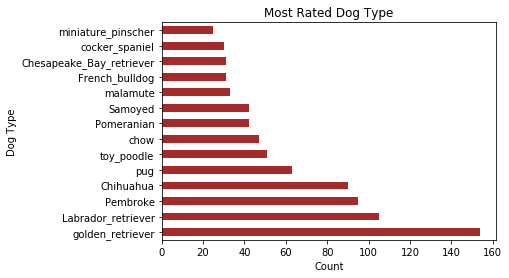

In [2218]:
whole.groupby('dogtype').filter(lambda x: len(x) >= 25)['dogtype'].value_counts().plot(kind = 'barh', color = 'brown')
plt.title('Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Dog Type')
fig = plt.gcf() 
fig.savefig('output1.png',bbox_inches='tight');

In [2219]:
whole.groupby(whole['year']).agg(['mean','count'])[['rating_numerator','favorite_count','retweet_count']]

rating_numerator       favorite_count       retweet_count      
                   mean count           mean count          mean count
year                                                                  
2015.0         7.568406   651    2148.896923   650    883.456923   650
2016.0         7.072071   965    6361.732848   962   2433.467775   962
2017.0         6.286667   375   20744.765027   366   5331.702186   366

In [2220]:
whole[whole['retweet_count'] == max(whole['retweet_count'])][['tweet_id','created_at','retweet_count','dogtype','dog_stage']]  #tweet with maximum number of retweets

,tweet_id,created_at,retweet_count,dogtype,dog_stage
1221,744234799360020481,2016-06-18 18:26:18,80525.0,Labrador_retriever,doggo


In [2221]:
whole[whole['retweet_count'] == min(whole['retweet_count'])][['tweet_id','created_at','retweet_count','dogtype','dog_stage']]  #tweet with minimum number of retweets

,tweet_id,created_at,retweet_count,dogtype,dog_stage
16,666102155909144576,2015-11-16 03:55:04,11.0,English_setter,NaN


In [2222]:
whole[whole['favorite_count'] == max(whole['favorite_count'])][['tweet_id','created_at','favorite_count','dogtype','dog_stage']]  #Maximum favorite count

,tweet_id,created_at,favorite_count,dogtype,dog_stage
1221,744234799360020481,2016-06-18 18:26:18,160907.0,Labrador_retriever,doggo


In [2223]:
whole['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1952
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

1. Thus, 1952 tweets are sent through 'iphone',28 through 'web' and 11 through 'tweetdeck'.
2. Compare this to our previous findings in uncleaned and raw data earlier in the project wherein we found out: 2221 tweets are sent through 'iphone',91 through 'Vine', 33 through 'web' and 11 through 'tweetdeck'. 
3. Clearly, most of the dirty which we cleaned were from tweets sent through 'Vine'. Thus, 'Vine' services requires optimization, so as to acquire cleaner data.

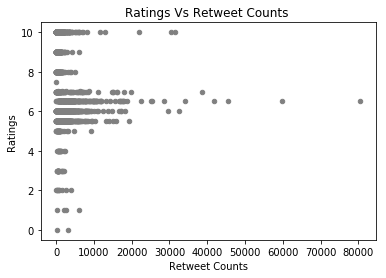

In [2224]:
whole.plot(x='retweet_count', y='rating_numerator', kind='scatter', c = 'grey')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Ratings Vs Retweet Counts ')
fig = plt.gcf()
fig.savefig('output2.png',bbox_inches='tight');

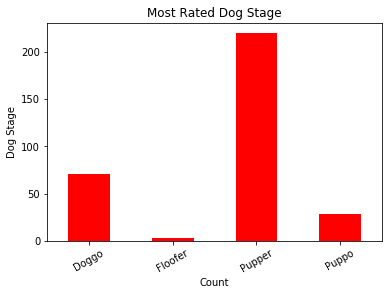

In [2225]:
whole.groupby('dog_stage')['dog_stage'].value_counts().plot(kind = 'bar', color = 'red').set_xticklabels(['Doggo','Floofer','Pupper','Puppo'], rotation = 30, size = 10)
plt.title('Most Rated Dog Stage')
plt.xlabel('Count')
plt.ylabel('Dog Stage')
fig = plt.gcf() 
fig.savefig('output3.png',bbox_inches='tight');

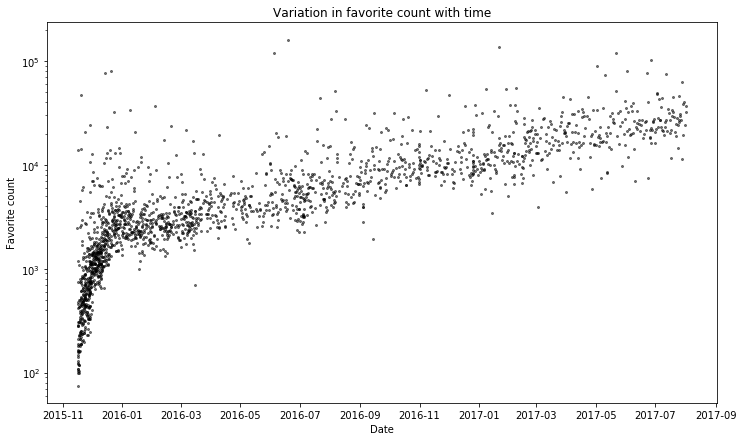

In [2226]:
fig,ax =plt.subplots()
ax.plot_date(whole['created_at'], whole['favorite_count'], alpha=0.5, ms = 2, c='black')
# log scale
ax.set_yscale('log')
fig.set_size_inches(12,7)
plt.xlabel('Date')
plt.ylabel('Favorite count')
plt.title('Variation in favorite count with time')
fig1 = plt.gcf() 
fig1.savefig('output4.png',bbox_inches='tight');

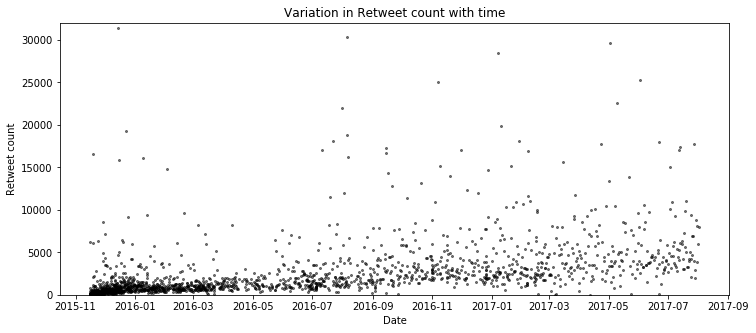

In [2227]:
fig,ax =plt.subplots()
ax.plot_date(whole['created_at'], whole['retweet_count'], alpha=0.5, ms = 2, c='black')
# Excluding Outliers
plt.ylim((0,32000))
fig.set_size_inches(12,5)
plt.xlabel('Date')
plt.ylabel('Retweet count')
plt.title('Variation in Retweet count with time')
fig1 = plt.gcf() 
fig1.savefig('output5.png',bbox_inches='tight');